# Bulls Efficiency Matrix

An Instagram-style visualization showing Bulls players positioned by their efficiency (True Shooting %) and volume (FGA per game).

**Quadrants:**
- **STARS** (top-right): High efficiency + high volume
- **SPECIALISTS** (top-left): High efficiency + low volume
- **CHUCKERS** (bottom-right): Low efficiency + high volume
- **LIMITED** (bottom-left): Low efficiency + low volume

In [20]:
import sys
from pathlib import Path

# Add parent directory to path so we can import bulls
sys.path.insert(0, str(Path().absolute().parent))

from bulls import data, viz
import matplotlib.pyplot as plt

%matplotlib inline

## Fetch Roster Efficiency Data

This aggregates True Shooting % and FGA per game for all Bulls players over the last N games.

In [21]:
# Fetch efficiency data for last 10 games, minimum 5 FGA per game
roster = data.get_roster_efficiency(last_n_games=10, min_fga=5.0)

# Filter to players who played at least 60% of games (6 of 10)
min_games = 6
roster = [p for p in roster if p['games'] >= min_games]

print(f"Found {len(roster)} players meeting criteria (min {min_games} games, min 5.0 FGA/G):\n")
for p in roster:
    print(f"{p['name']:20} | {p['ts_pct']:5.1f}% TS | {p['fga_per_game']:4.1f} FGA/G | {p['games']} games")

Found 8 players meeting criteria (min 6 games, min 5.0 FGA/G):

Nikola Vučević       |  58.0% TS | 15.0 FGA/G | 10 games
Matas Buzelis        |  59.8% TS | 12.7 FGA/G | 10 games
Coby White           |  62.0% TS | 11.8 FGA/G | 9 games
Ayo Dosunmu          |  66.2% TS | 11.1 FGA/G | 10 games
Jalen Smith          |  56.9% TS |  9.9 FGA/G | 8 games
Kevin Huerter        |  54.6% TS |  8.2 FGA/G | 10 games
Tre Jones            |  73.4% TS |  8.0 FGA/G | 9 games
Isaac Okoro          |  54.7% TS |  6.7 FGA/G | 10 games


## Create Efficiency Matrix

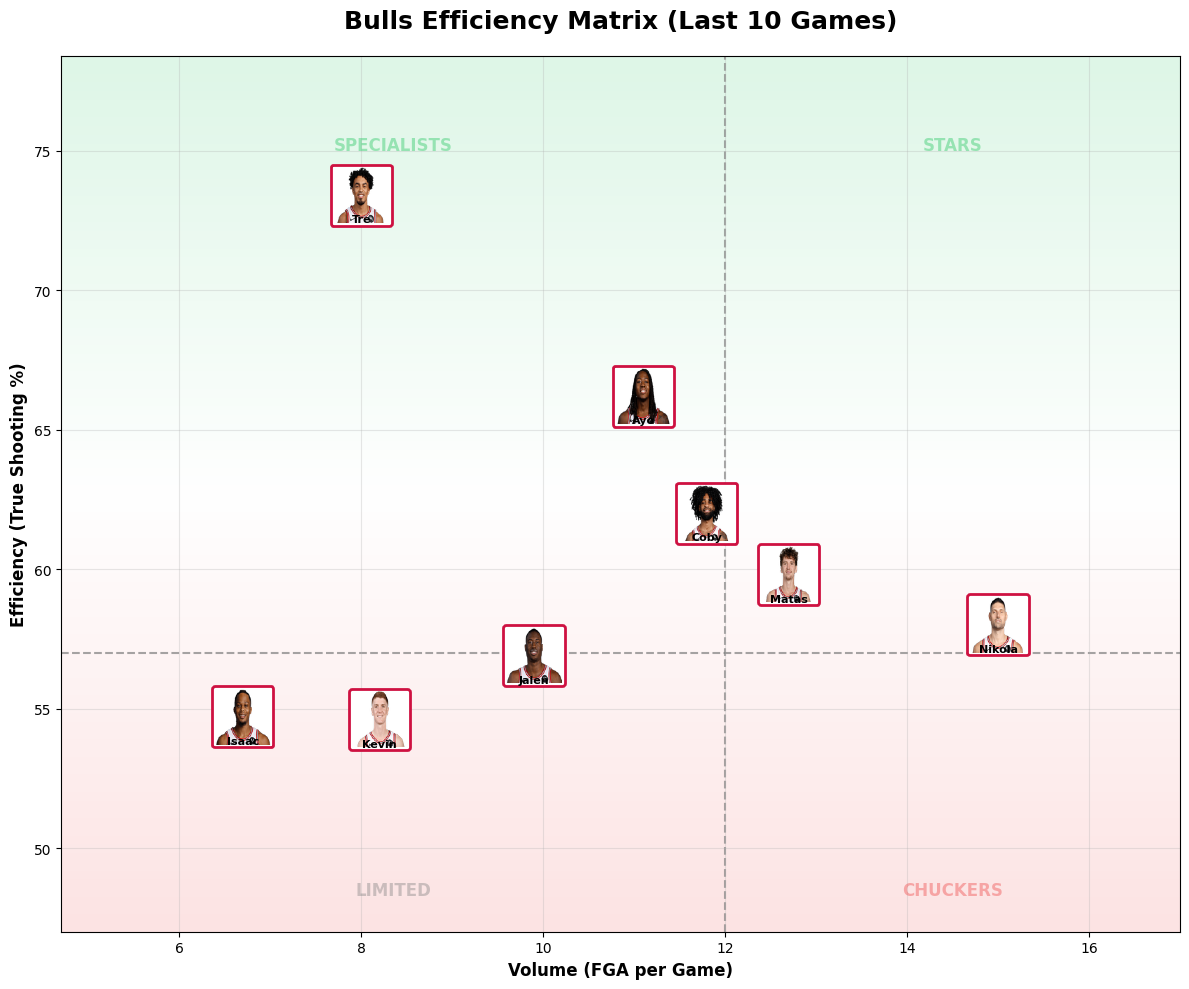

In [22]:
fig = viz.efficiency_matrix(
    roster,
    title="Bulls Efficiency Matrix (Last 10 Games)",
    league_avg_ts=57.0,   # League average True Shooting %
    league_avg_fga=12.0,  # League average FGA per game
    show_gradient=True,
    show_names=True,
)
plt.show()

## Last 20 Games

Found 8 players (min 12 games):

Nikola Vučević       |  61.1% TS | 14.4 FGA/G | 20 games
Matas Buzelis        |  60.6% TS | 12.2 FGA/G | 20 games
Coby White           |  62.3% TS | 11.4 FGA/G | 16 games
Ayo Dosunmu          |  61.8% TS | 10.2 FGA/G | 19 games
Kevin Huerter        |  55.5% TS |  8.9 FGA/G | 20 games
Tre Jones            |  68.4% TS |  7.7 FGA/G | 19 games
Jalen Smith          |  58.9% TS |  7.6 FGA/G | 18 games
Isaac Okoro          |  60.0% TS |  6.5 FGA/G | 20 games


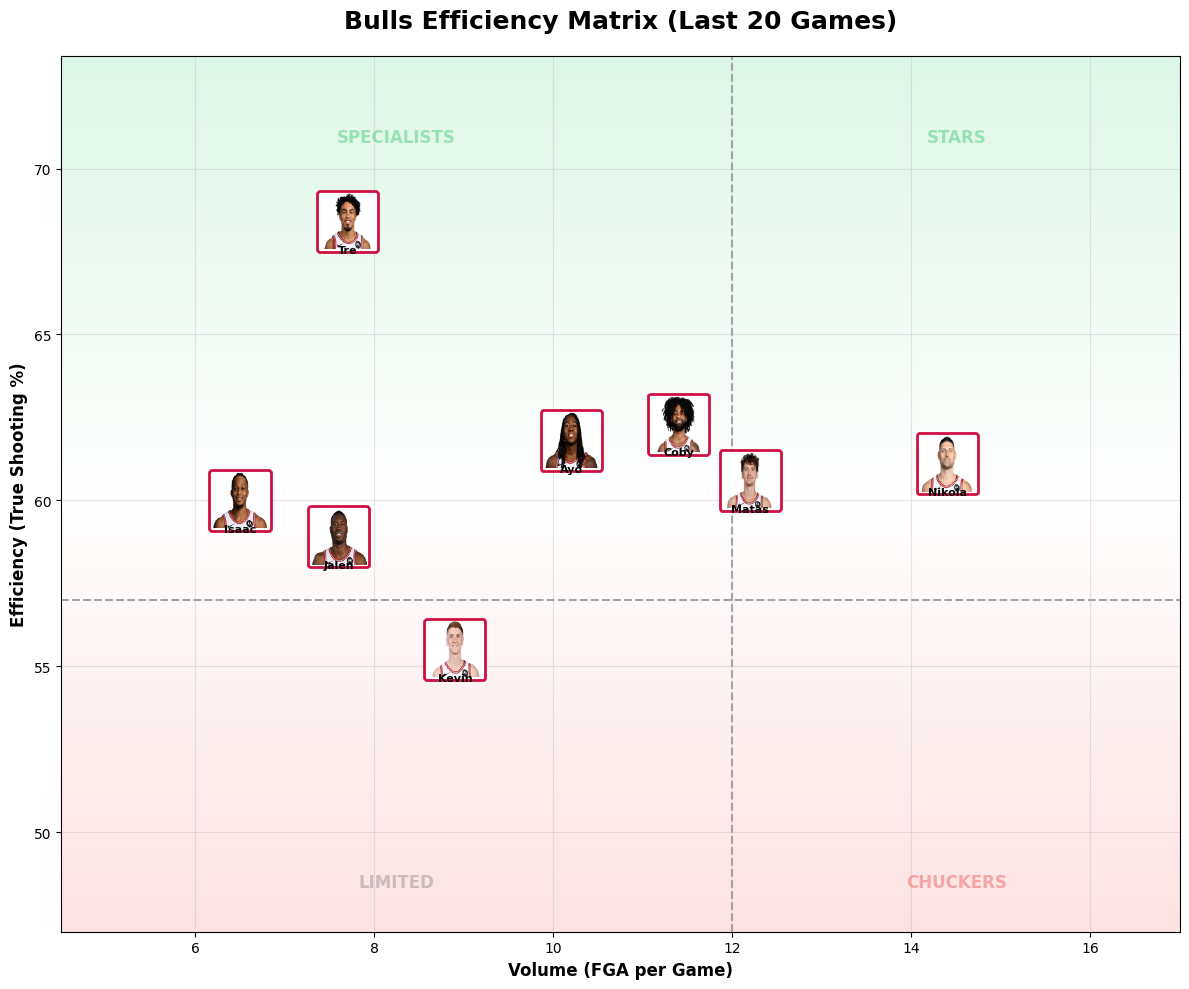

In [24]:
# Longer sample size (last 20 games)
roster_20 = data.get_roster_efficiency(last_n_games=20, min_fga=5.0)

# Filter to players who played at least 60% of games (12 of 20)
min_games = 12
roster_20 = [p for p in roster_20 if p['games'] >= min_games]

print(f"Found {len(roster_20)} players (min {min_games} games):\n")
for p in roster_20:
    print(f"{p['name']:20} | {p['ts_pct']:5.1f}% TS | {p['fga_per_game']:4.1f} FGA/G | {p['games']} games")

fig = viz.efficiency_matrix(
    roster_20,
    title="Bulls Efficiency Matrix (Last 20 Games)",
)
plt.show()

## Full Season to Date

A broader view of the entire season, with stricter filters to focus on rotation players:
- **min_games = 25**: Filters out players who were waived, traded, or rarely play
- **min_fga = 6.0**: Higher volume threshold for full-season context

Found 9 players (min 25 games, min 6.0 FGA/G):

Nikola Vučević       |  58.7% TS | 13.7 FGA/G | 44 games
Josh Giddey          |  57.6% TS | 13.6 FGA/G | 33 games
Coby White           |  59.8% TS | 13.0 FGA/G | 25 games
Matas Buzelis        |  59.3% TS | 11.3 FGA/G | 45 games
Ayo Dosunmu          |  63.4% TS |  9.9 FGA/G | 41 games
Kevin Huerter        |  57.0% TS |  9.3 FGA/G | 40 games
Jalen Smith          |  59.1% TS |  7.6 FGA/G | 38 games
Tre Jones            |  64.8% TS |  7.5 FGA/G | 40 games
Isaac Okoro          |  58.0% TS |  6.6 FGA/G | 38 games


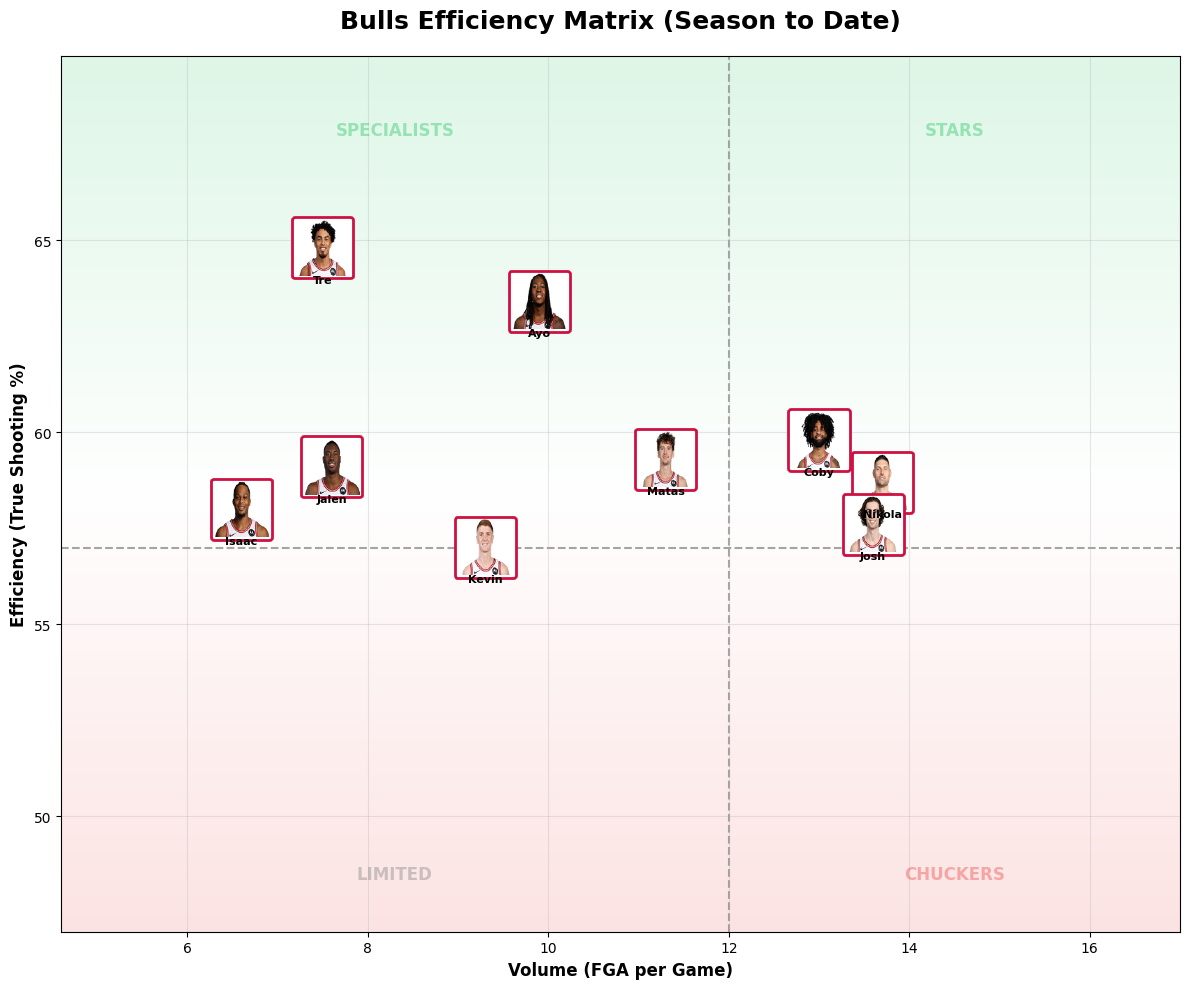

In [25]:
# Full season (82 caps at actual games played)
roster_season = data.get_roster_efficiency(last_n_games=82, min_fga=6.0)

# Filter to players who played at least 25 games (filters out waived/traded/DNPs)
min_games = 25
roster_season = [p for p in roster_season if p['games'] >= min_games]

print(f"Found {len(roster_season)} players (min {min_games} games, min 6.0 FGA/G):\n")
for p in roster_season:
    print(f"{p['name']:20} | {p['ts_pct']:5.1f}% TS | {p['fga_per_game']:4.1f} FGA/G | {p['games']} games")

fig = viz.efficiency_matrix(
    roster_season,
    title="Bulls Efficiency Matrix (Season to Date)",
)
plt.show()